# Описание проекта 

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши.<br> Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.<br>
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:<br>
лог сервера с данными о посещениях сайта Яндекс.<br>Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.


Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта
<br>
orders_log.csv — информацию о заказах
<br>
costs.csv — информацию о расходах на маркетинг.
<br>
Структура visits_log.csv<br>
Uid — уникальный идентификатор пользователя<br>
Device — категория устройства пользователя<br>
Start Ts — дата и время начала сессии<br>
End Ts — дата и время окончания сессии<br>
Source Id — идентификатор источника перехода на сайт.<br>
Структура orders_log.csv<br>
Uid — уникальный идентификатор пользователя<br>
Buy Ts — дата и время заказа<br>
Revenue — сумма заказа.<br>
Структура costs.csv<br>
source_id — идентификатор рекламного источника<br>
dt — дата проведения рекламной кампании<br>
costs — расходы на эту кампанию.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt           # графики
import matplotlib.ticker as ticker
import seaborn as sns

# Загрузка данных и подготовка их к анализу

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv') 

In [3]:
orders = pd.read_csv('/datasets/orders_log.csv') 

In [4]:
costs = pd.read_csv('/datasets/costs.csv') 

In [5]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
costs.duplicated().sum()

0

In [8]:
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [9]:
costs.columns = ['source_id', 'date', 'costs']

In [10]:
costs = costs[['source_id', 'costs', 'date']]

In [11]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [12]:
costs.tail()

,source_id,costs,date
2537,10,9.92,2018-05-27
2538,10,21.26,2018-05-28
2539,10,11.32,2018-05-29
2540,10,33.15,2018-05-30
2541,10,17.60,2018-05-31


In [13]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [15]:
visits.duplicated().sum()

0

In [16]:
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [17]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [18]:
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']] 

In [19]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
visits.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int64
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [21]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [23]:
orders.duplicated().sum()

0

In [24]:
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [25]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [26]:
orders = orders[['uid', 'revenue', 'purchase_ts']]

In [27]:
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [28]:
orders.tail()

,uid,revenue,purchase_ts
50410,12296626599487328624,4.64,2018-05-31 23:50:00
50411,11369640365507475976,5.80,2018-05-31 23:50:00
50412,1786462140797698849,0.30,2018-05-31 23:54:00
50413,3993697860786194247,3.67,2018-05-31 23:56:00
50414,83872787173869366,3.42,2018-06-01 00:02:00


In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid            50415 non-null uint64
revenue        50415 non-null float64
purchase_ts    50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


# Построим отчёты и посчитаем метрики

# Продуктовые метрики

<b>DAU, WAU и MAU</b>

In [30]:
visits['date'] = visits['start_ts'].dt.date

In [31]:
visits['day_number'] = visits['start_ts'].dt.day

In [32]:
visits['month'] = visits['start_ts'].dt.month

In [33]:
visits['year'] = visits['start_ts'].dt.year

In [34]:
visits['week_number'] = visits['start_ts'].dt.week

In [35]:
visits['day_of_week'] = visits['start_ts'].dt.day_name()

In [36]:
visits['month_name'] = visits['start_ts'].dt.month_name()

In [37]:
visits.head() 

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,12,2017,52,Wednesday,December


In [38]:
dau_total = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print("Ежедневная аудитория DAU {0:.2f} человек".format(dau_total[0]))

Ежедневная аудитория DAU 907.99 человек


In [39]:
wau_total = visits.groupby('week_number').agg({'uid': 'nunique'}).mean()
print("Еженедельная аудитория WAU {0:.2f} человек".format(wau_total[0]))

Еженедельная аудитория WAU 5825.29 человек


In [40]:
mau_total = visits.groupby('month').agg({'uid': 'nunique'}).mean()
print("Ежемесячная аудитория MAU {0:.2f} человек".format(mau_total[0]))

Ежемесячная аудитория MAU 23228.42 человек


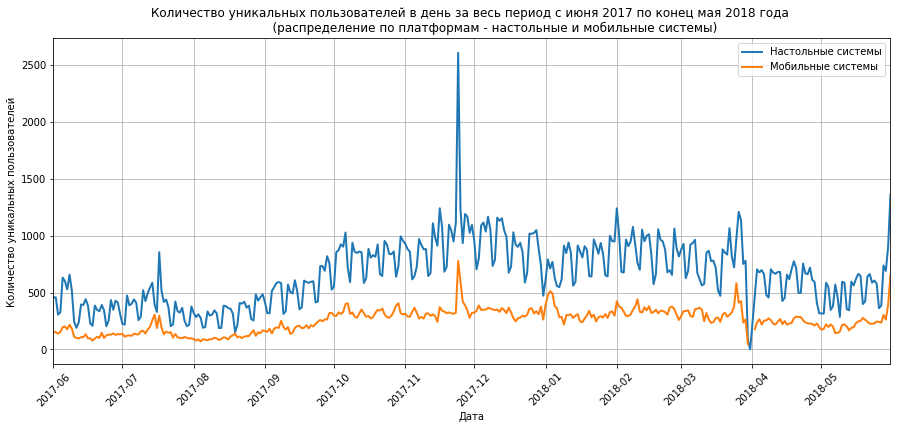

In [41]:
ax = visits.pivot_table(index='date', 
                           columns='device', 
                           aggfunc=({'uid': 'nunique'})).plot(figsize=(15, 6), lw=2)

plt.title('Количество уникальных пользователей в день за весь период с июня 2017 по конец мая 2018 года \n \
           (распределение по платформам - настольные и мобильные системы)')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='both')
plt.legend(['Настольные системы', 'Мобильные системы'], loc='best')


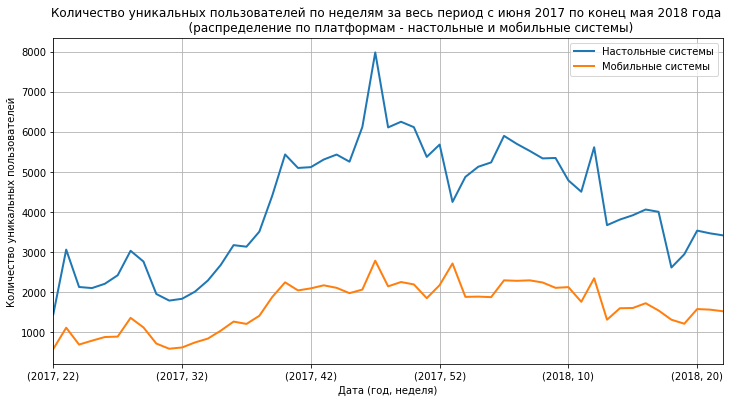

In [42]:
ax = visits.pivot_table(index=['year','week_number'], 
                           columns='device', 
                           aggfunc=({'uid': 'nunique'})).plot(figsize=(12, 6), lw=2)
plt.title('Количество уникальных пользователей по неделям за весь период с июня 2017 по конец мая 2018 года \n \
           (распределение по платформам - настольные и мобильные системы)')
plt.xlabel('Дата (год, неделя)')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='both')
plt.legend(['Настольные системы', 'Мобильные системы'], loc='best');

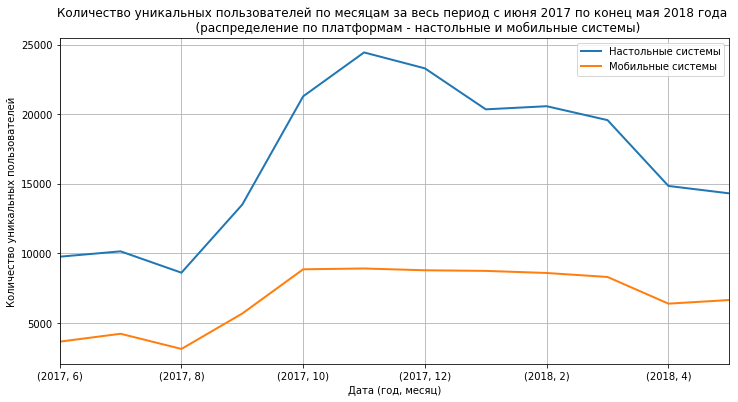

In [43]:
ax = visits.pivot_table(index=['year','month'], 
                           columns='device', 
                           aggfunc=({'uid': 'nunique'})).plot(figsize=(12, 6), lw=2)
plt.title('Количество уникальных пользователей по месяцам за весь период с июня 2017 по конец мая 2018 года \n \
           (распределение по платформам - настольные и мобильные системы)')
plt.xlabel('Дата (год, месяц)')
plt.ylabel('Количество уникальных пользователей')
plt.grid(which='both', axis='both')
plt.legend(['Настольные системы', 'Мобильные системы'], loc='best')

<b>Сколько раз за день пользователи в среднем заходят на сайт</b>

In [44]:
session_count = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Количество сессий в день {0:.2f} ".format(session_count[0]))

Количество сессий в день 987.36 


<b>Сколько длится одна сессия</b>

In [45]:
visits['session_duration_minunes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

In [46]:
visits['session_duration_minunes'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_minunes, dtype: float64

In [47]:
visits = visits.query('session_duration_minunes >= 0')

In [48]:
visits['session_duration_minunes'].describe()

count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_minunes, dtype: float64

In [49]:
visits['session_duration_minunes'].mode()

0    1.0
dtype: float64

<b>Вывод:<b/>

в среднем 10 минут<br>
в медианном 5 минут

Text(0, 0.5, 'Количество сессий')

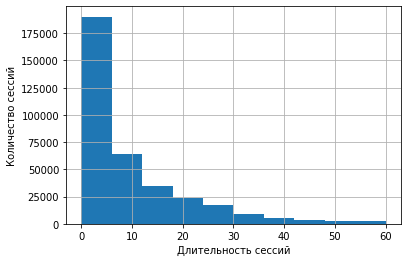

In [50]:
visits['session_duration_minunes'].hist(bins=10, range=(0, 60))
plt.xlabel('Длительность сессий')
plt.ylabel('Количество сессий')

<b>Как часто люди возвращаются</b>

In [51]:
first_activity = visits.groupby('uid').agg({'start_ts':'min'})
first_activity.columns = ['first_activity']
visits = visits.join(first_activity, on='uid')

In [52]:
visits_rr = visits[['uid', 'first_activity', 'start_ts']]
visits_rr['first_activity_month'] = visits_rr['first_activity'].astype('datetime64[M]')
visits_rr['start_ts_month'] = visits_rr['start_ts'].astype('datetime64[M]')
visits_rr['lifetime'] = ((visits_rr['start_ts_month'] - visits_rr['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits_rr.head(5)
cohorts_visits = visits_rr.groupby(['first_activity_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts_visits[cohorts_visits['lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count.columns = ['first_activity_month', 'cohort_users']
initial_users_count = initial_users_count.set_index('first_activity_month')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [53]:
cohorts_visits = cohorts_visits.join(initial_users_count, on = 'first_activity_month')

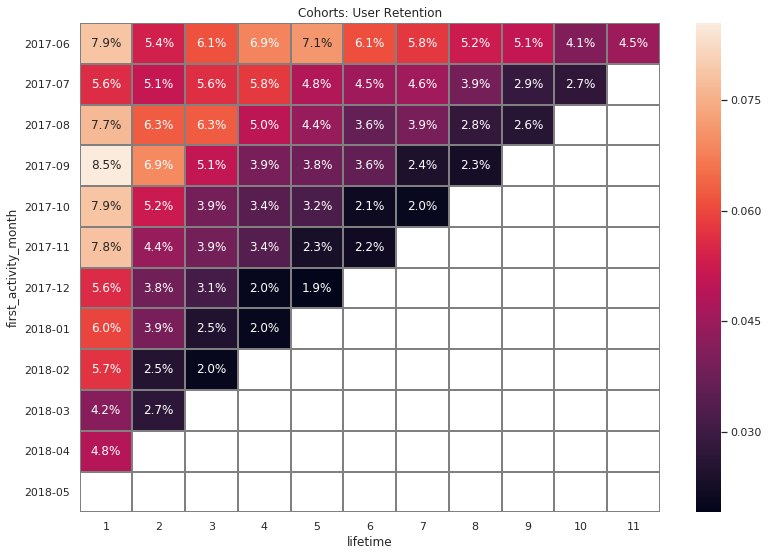

In [54]:
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']
retention_pivot = cohorts_visits.pivot_table(index='first_activity_month',
                                      columns='lifetime',
                                      values='retention',
                                      aggfunc='sum')
retention_pivot = retention_pivot.reset_index()
retention_pivot['first_activity_month'] = retention_pivot['first_activity_month'].dt.strftime('%Y-%m')
retention_pivot = retention_pivot.set_index('first_activity_month')
retention_pivot
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.iloc[:, 1:], annot=True, fmt='.1%', linewidths=1, linecolor='gray')

In [55]:
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()

In [56]:
first_visit.columns = ['uid', 'first_visit']

In [57]:
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [58]:
visits = visits.merge(first_visit, on='uid')

In [59]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,session_duration_minunes,first_activity,first_visit
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December,18.0,2017-12-20 17:20:00,2017-12-20 17:20:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February,28.0,2018-02-19 16:53:00,2018-02-19 16:53:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July,0.0,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May,24.0,2018-03-09 20:05:00,2018-03-09 20:05:00
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,9,3,2018,10,Friday,March,28.0,2018-03-09 20:05:00,2018-03-09 20:05:00


In [60]:
visits['activity_month'] = pd.to_datetime(visits['start_ts'], unit='d') - pd.to_timedelta(visits['start_ts'].dt.month, unit='d')
visits['first_activity_month'] = pd.to_datetime(visits['first_visit'], unit='d') - pd.to_timedelta(visits['first_visit'].dt.month, unit='d')

In [61]:
visits['activity_month'] = visits['activity_month'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_month'].astype('datetime64[M]')

In [62]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [63]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [64]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

In [65]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [66]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [67]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

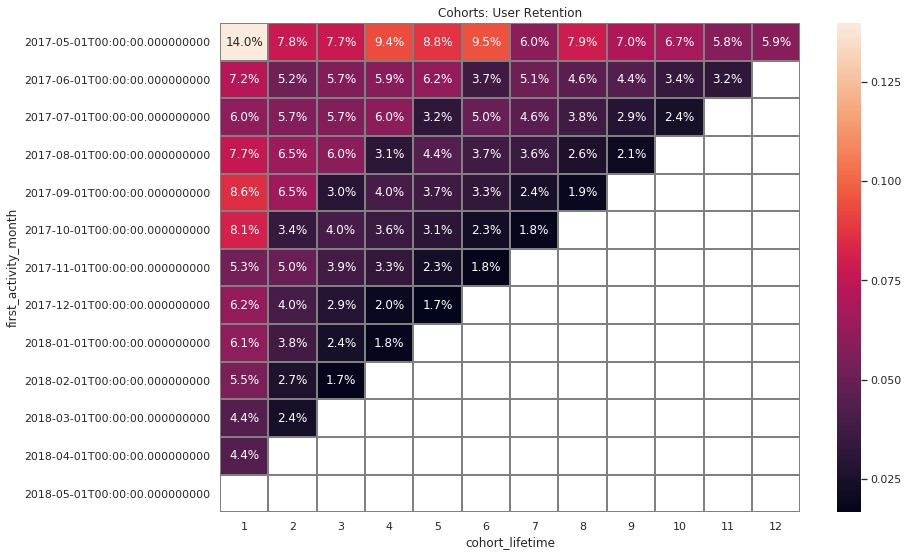

In [68]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.iloc[:, 1:], annot=True, fmt='.1%', linewidths=1, linecolor='gray');

# Метрики электронной коммерции

<b>Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки</b>

In [69]:
orders.head()

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [70]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,session_duration_minunes,first_activity,first_visit,activity_month,first_activity_month,cohort_lifetime
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December,18.0,2017-12-20 17:20:00,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February,28.0,2018-02-19 16:53:00,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July,0.0,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-06-01,2017-06-01,0
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May,24.0,2018-03-09 20:05:00,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,9,3,2018,10,Friday,March,28.0,2018-03-09 20:05:00,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [71]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_date'})\
                .reset_index()

In [72]:
first_order = orders.groupby('uid').agg({'purchase_ts':'min'})\
                .rename(columns={'purchase_ts':'first_purchase_date'})\
                .reset_index()

In [73]:
buying_time = first_visit.merge(first_order, on='uid', how='inner')

In [74]:
buying_time.head()

,uid,first_visit_date,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [75]:
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60

In [76]:
buying_time.head()

,uid,first_visit_date,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


In [77]:
buying_time['buying_time'].mode()

0    1.0
dtype: float64

In [78]:
buying_time['buying_time'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buying_time, dtype: float64

In [79]:
buying_time[buying_time['buying_time'] == 0].count()

uid                    2467
first_visit_date       2467
first_purchase_date    2467
buying_time            2467
dtype: int64

Text(0.5, 1.0, 'Время в минутах от первого визита до покупки')

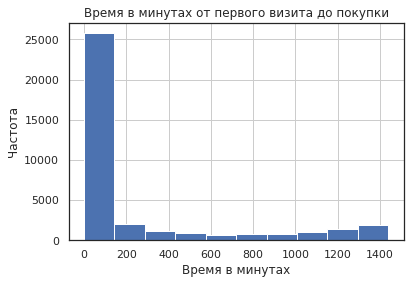

In [80]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Время в минутах')
ax.set_ylabel('Частота')
ax.set_title('Время в минутах от первого визита до покупки')

в среднем через 249 минут<br>
в медианном через 16 минут

<b>Среднее количество покупок на одного покупателя за определённый период</b>

In [81]:
orders['buy_month'] = orders['purchase_ts'].astype('datetime64[M]')
orders['buy_date'] = orders['purchase_ts'].dt.date
orders['buy_week'] = orders['purchase_ts'].dt.week
orders['buy_year'] = orders['purchase_ts'].dt.year
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'purchase_ts':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}
'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32



In [82]:
orders_per_user = orders.groupby(['buy_month']).agg({'uid':['count', 'nunique']}).reset_index()

In [83]:
orders_per_user.columns = ['buy_month', 'n_orders', 'n_users']

In [84]:
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']


In [85]:
print('В месяц в среднем покупок на одного пользователя {:.2f}'.format(orders_per_user['orders_per_user'][:-1].mean()))
print('В месяц в среднем ВСЕГО покупок {:.0f}'.format(orders.groupby('buy_month').agg({'uid':'count'})[:-1].mean()[0]))

В месяц в среднем покупок на одного пользователя 1.22
В месяц в среднем ВСЕГО покупок 4201


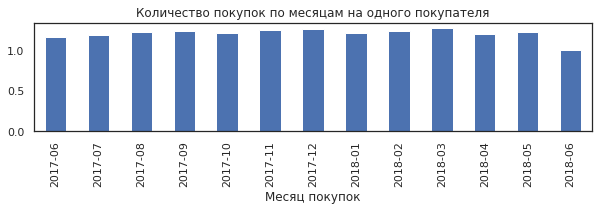

In [86]:
orders_per_user['buy_month'] = orders_per_user['buy_month'].dt.strftime('%Y-%m')
orders_per_user = orders_per_user.set_index('buy_month')
plt.figure(figsize=(10,2))
orders_per_user['orders_per_user'].plot(kind = 'bar', title = 'Количество покупок по месяцам на одного покупателя')
plt.xlabel('Месяц покупок')
plt.show()

In [87]:
orders_per_user

,n_orders,n_users,orders_per_user
buy_month,,,
2017-06,2354,2023,1.163618
2017-07,2363,1984,1.191028
2017-08,1807,1472,1.227582
2017-09,3387,2750,1.231636
2017-10,5679,4675,1.214759
2017-11,5659,4547,1.244557
2017-12,6218,4942,1.258195
2018-01,4721,3898,1.211134
2018-02,5281,4258,1.240254


In [88]:
orders_and_visits = orders.merge(first_visit)

In [89]:
orders_and_visits.head()

,uid,revenue,purchase_ts,buy_month,buy_date,buy_week,buy_year,first_visit_date
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:09:00
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:14:00
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:25:00
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:14:00
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01,22,2017,2017-06-01 07:31:00


In [90]:
orders_and_visits['purchase_date'] = orders_and_visits['purchase_ts'].dt.date

In [91]:
orders_and_visits['purchases_week'] = orders_and_visits['purchase_ts'].dt.week

In [92]:
orders_and_visits['purchase_month'] = orders_and_visits['purchase_ts'].dt.month

In [93]:
purchases_per_day = orders_and_visits.groupby('purchase_date')['uid'].count()

In [94]:
purchases_per_week = orders_and_visits.groupby(['purchases_week'])['uid'].count()

In [95]:
purchases_per_month = orders_and_visits.groupby(['purchase_month'])['uid'].count()

In [96]:
orders_count = pd.DataFrame()

In [97]:
orders_count['per_day'] = purchases_per_day.describe()

In [98]:
orders_count['per_week'] = purchases_per_week.describe()

In [99]:
orders_count['per_month'] = purchases_per_month.describe()

In [100]:
orders_count.head(10)

,per_day,per_week,per_month
count,364.000000,52.000000,12.000000
mean,138.502747,969.519231,4201.250000
std,76.858480,397.630457,1511.861052
min,1.000000,314.000000,1807.000000
25%,82.750000,658.500000,3045.500000
50%,136.000000,997.500000,4533.500000
75%,177.000000,1270.500000,5409.250000
max,814.000000,1894.000000,6218.000000


<b>Средний чек </b>

In [101]:
orders_and_visits['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [102]:
orders_and_visits['revenue'].mode()

0    1.83
dtype: float64

In [103]:
orders_and_visits.head()

,uid,revenue,purchase_ts,buy_month,buy_date,buy_week,buy_year,first_visit_date,purchase_date,purchases_week,purchase_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:09:00,2017-06-01,22,6
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:14:00,2017-06-01,22,6
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:25:00,2017-06-01,22,6
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01,22,2017,2017-06-01 00:14:00,2017-06-01,22,6
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01,22,2017,2017-06-01 07:31:00,2017-06-01,22,6


In [104]:
mean_purchase_by_month = orders_and_visits.groupby('purchase_month').agg({'revenue': 'mean'})

In [105]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', \
             'December', 'January', 'February', 'March', 'April', 'May']

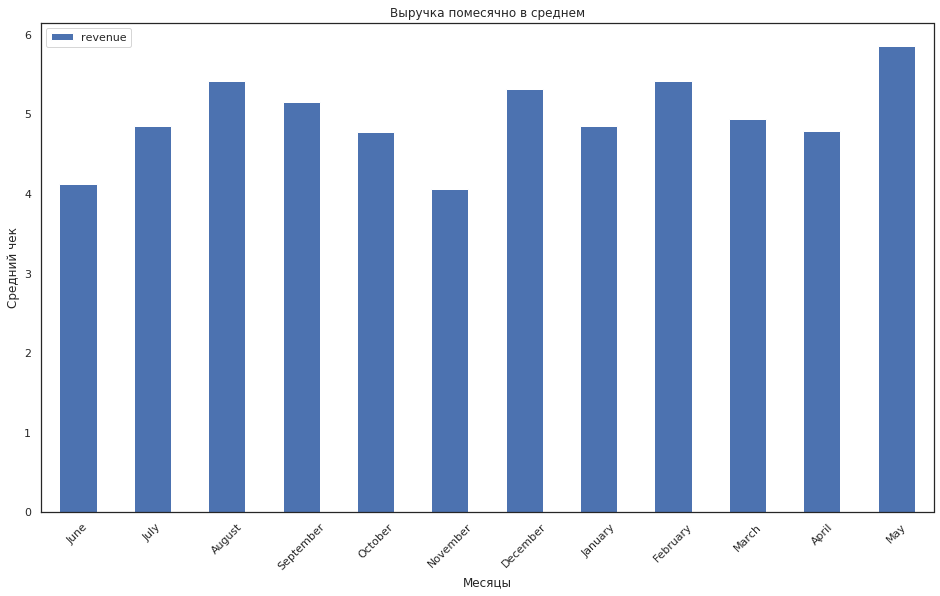

In [106]:
ax = mean_purchase_by_month.plot(kind='bar', figsize=(16, 9))
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Выручка помесячно в среднем')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Средний чек')
plt.show()

Средний чек колеблится от 4-6

<b>LTV</b>

In [107]:
orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]')

In [108]:
first_orders = orders.groupby(['uid']).agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [109]:
first_activity_source = visits.sort_values(by='start_ts').groupby('uid', as_index = False).agg({'source_id':'first'})
first_activity_source.name = 'first_activity_source'
first_activity_source.columns = ['uid', 'first_activity_source']
first_activity_source

,uid,first_activity_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


In [110]:
first_orders = first_orders.merge(first_activity_source, on='uid', how='left')

In [111]:
cohort_sizes = first_orders.groupby(['first_order_month', 'first_activity_source']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'first_activity_source', 'n_buyers']
cohort_sizes

,first_order_month,first_activity_source,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


In [112]:
orders_first_month = pd.merge(orders,first_orders, on='uid')
orders_first_month.sample(20) 

,uid,revenue,purchase_ts,buy_month,buy_date,buy_week,buy_year,order_month,first_order_month,first_activity_source
19721,16953149292608477107,25.67,2017-11-02 23:01:00,2017-11-01,2017-11-02,44,2017,2017-11-01,2017-11-01,2
42457,10990413909635467358,1.10,2018-03-17 23:28:00,2018-03-01,2018-03-17,11,2018,2018-03-01,2018-03-01,3
5828,13671161131727747822,4.89,2017-07-14 20:15:00,2017-07-01,2017-07-14,28,2017,2017-07-01,2017-07-01,4
6362,4809169699792376513,3.30,2017-07-18 13:11:00,2017-07-01,2017-07-18,29,2017,2017-07-01,2017-07-01,5
28823,1802230762035949715,3.67,2017-12-18 23:07:00,2017-12-01,2017-12-18,51,2017,2017-12-01,2017-12-01,2
1893,1722001479108386584,1.16,2017-06-06 09:41:00,2017-06-01,2017-06-06,23,2017,2017-06-01,2017-06-01,5
36950,3535178422593410549,0.12,2018-02-09 22:15:00,2018-02-01,2018-02-09,6,2018,2018-02-01,2018-02-01,3
43574,16684896151029508578,7.00,2018-03-25 13:38:00,2018-03-01,2018-03-25,12,2018,2018-03-01,2018-03-01,3
5203,10277211243923810415,1.22,2017-07-09 11:14:00,2017-07-01,2017-07-09,27,2017,2017-07-01,2017-07-01,1
41673,13033323545293536041,1.17,2018-03-11 18:27:00,2018-03-01,2018-03-11,10,2018,2018-03-01,2018-03-01,3


In [113]:
cohorts_2 = orders_first_month.groupby(['first_order_month','order_month', 'first_activity_source']).agg({'revenue': 'sum'}).reset_index()
cohorts_2.sample(10)

,first_order_month,order_month,first_activity_source,revenue
207,2017-08-01,2018-05-01,5,84.44
129,2017-07-01,2018-03-01,5,39.09
472,2018-02-01,2018-05-01,4,20.47
299,2017-10-01,2018-02-01,1,21.51
320,2017-10-01,2018-05-01,1,109.06
388,2017-12-01,2018-01-01,9,38.00
497,2018-04-01,2018-04-01,3,2805.85
134,2017-07-01,2018-04-01,3,20.89
47,2017-06-01,2018-01-01,4,96.27
96,2017-07-01,2017-10-01,3,201.72


In [114]:
report = pd.merge(cohort_sizes, cohorts_2, on=['first_order_month', 'first_activity_source'])
report

,first_order_month,first_activity_source,n_buyers,order_month,revenue
0,2017-06-01,1,190,2017-06-01,1378.70
1,2017-06-01,1,190,2017-07-01,414.98
2,2017-06-01,1,190,2017-08-01,419.43
3,2017-06-01,1,190,2017-09-01,714.24
4,2017-06-01,1,190,2017-10-01,811.20
...,...,...,...,...,...
511,2018-05-01,4,804,2018-05-01,3802.91
512,2018-05-01,5,497,2018-05-01,2094.04
513,2018-05-01,9,60,2018-05-01,223.05
514,2018-05-01,10,130,2018-05-01,470.89


In [115]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head(20)

,first_order_month,first_activity_source,n_buyers,order_month,revenue,gp,age
0,2017-06-01,1,190,2017-06-01,1378.70,1378.70,0
1,2017-06-01,1,190,2017-07-01,414.98,414.98,1
2,2017-06-01,1,190,2017-08-01,419.43,419.43,2
3,2017-06-01,1,190,2017-09-01,714.24,714.24,3
4,2017-06-01,1,190,2017-10-01,811.20,811.20,4
5,2017-06-01,1,190,2017-11-01,389.34,389.34,5
6,2017-06-01,1,190,2017-12-01,490.48,490.48,6
7,2017-06-01,1,190,2018-01-01,479.23,479.23,7
8,2017-06-01,1,190,2018-02-01,432.15,432.15,8
9,2017-06-01,1,190,2018-03-01,316.30,316.30,9


In [116]:
report['ltv'] = report['gp'] / report['n_buyers']

In [117]:
report.head(20)

,first_order_month,first_activity_source,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,1,190,2017-06-01,1378.70,1378.70,0,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,414.98,1,2.184105
2,2017-06-01,1,190,2017-08-01,419.43,419.43,2,2.207526
3,2017-06-01,1,190,2017-09-01,714.24,714.24,3,3.759158
4,2017-06-01,1,190,2017-10-01,811.20,811.20,4,4.269474
5,2017-06-01,1,190,2017-11-01,389.34,389.34,5,2.049158
6,2017-06-01,1,190,2017-12-01,490.48,490.48,6,2.581474
7,2017-06-01,1,190,2018-01-01,479.23,479.23,7,2.522263
8,2017-06-01,1,190,2018-02-01,432.15,432.15,8,2.274474
9,2017-06-01,1,190,2018-03-01,316.30,316.30,9,1.664737


In [118]:
result_ltv = report.pivot_table( index='first_order_month', columns='age', values='ltv', aggfunc='mean')

In [119]:
test = result_ltv.cumsum(axis=1)
test2 = test.mean(axis=0).to_frame('cumsum mean').T
ltv = pd.concat([test, test2])

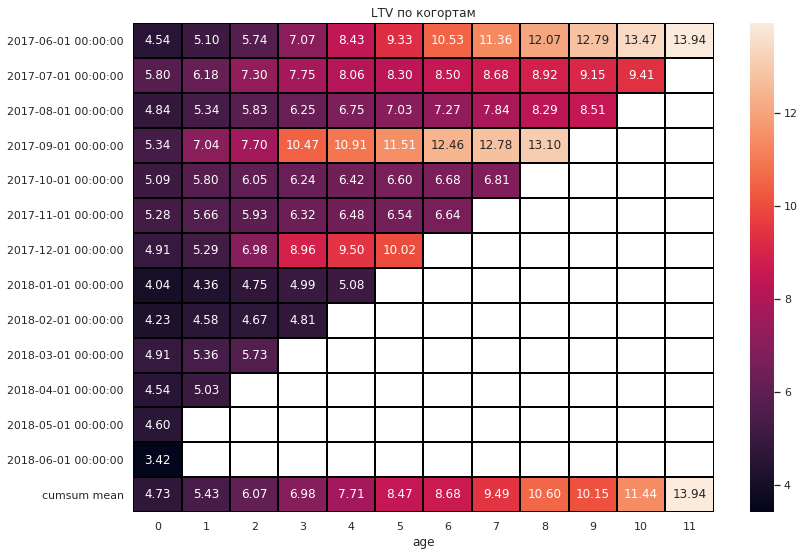

In [120]:
plt.figure(figsize=(13, 9))
plt.title('LTV по когортам')
sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='black')

Лучше всех себя показали первая когорта и 2017-09-01

# Маркетинг

<b>Общая сумма расходов</b>

In [121]:
costs['costs'].sum()

329131.62

In [122]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [123]:
costs_by_source['in_percents'] = costs_by_source['costs'] / 329131.62 * 100

In [124]:
costs_by_source.sort_values('in_percents', ascending = False)

,source_id,costs,in_percents
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
1,2,42806.04,13.005751
0,1,20833.27,6.329769
6,10,5822.49,1.769046
5,9,5517.49,1.676378


In [125]:
costs.head()

,source_id,costs,date,month
0,1,75.20,2017-06-01,2017-06-01
1,1,62.25,2017-06-02,2017-06-01
2,1,36.53,2017-06-03,2017-06-01
3,1,55.00,2017-06-04,2017-06-01
4,1,57.08,2017-06-05,2017-06-01


In [126]:
costs['costs_month'] = costs['date'].astype('datetime64[M]').dt.date

In [127]:
costs_by_month = costs.groupby('costs_month')['costs'].sum().reset_index()

In [128]:
costs_by_month

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


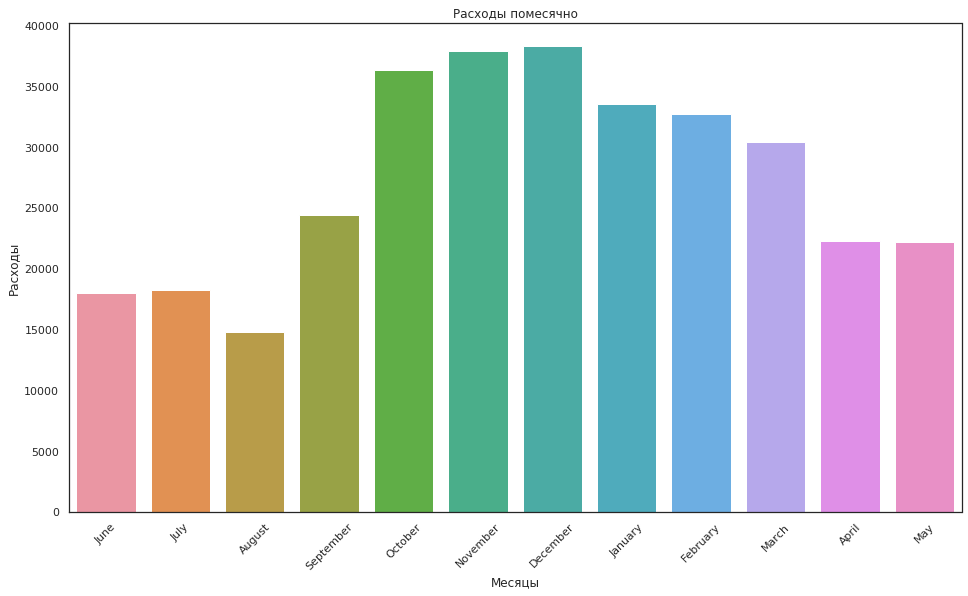

In [129]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="costs_month", y="costs", data=costs_by_month)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Расходы помесячно')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

Больше всего потратили денег в октябре, ноябре, декабре.

<b>Сколько стоило привлечение одного покупателя из каждого источника?</b>

In [130]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [131]:
visits_by_source = visits.query('start_ts == first_visit')

In [132]:
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'})

In [133]:
customers_by_source.reset_index() 

,source_id,customers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [134]:
cac = customers_by_source.join(costs_by_source).reset_index() 

In [135]:
cac

,source_id,customers,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10
5,7,1,NaN
6,9,1088,5517.49
7,10,1329,5822.49


In [136]:
cac = cac.fillna(0)

In [137]:
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,source_id,customers,costs,cac
2,3,10473,141321.63,13.493901
1,2,3506,42806.04,12.209367
4,5,6931,51757.10,7.467479
0,1,2899,20833.27,7.186364
3,4,10296,61073.60,5.931779
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106
5,7,1,0.00,0.000000


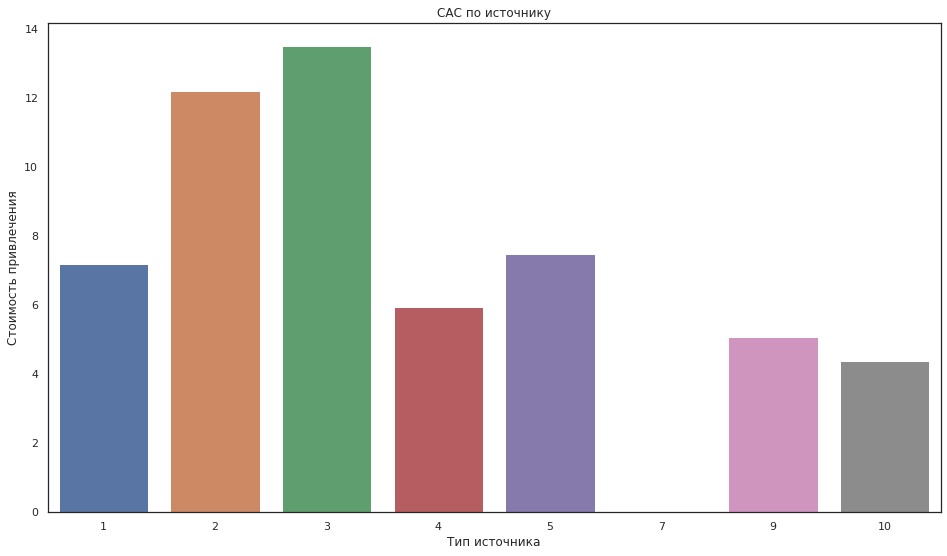

In [138]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

<b>ROI</b>

In [139]:
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [140]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [141]:
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

In [142]:
roi.sort_values('roi', ascending = False)

,revenue,costs,roi
source_id,,,
1,31090.55,20833.27,0.492351
2,46923.61,42806.04,0.096191
9,5759.40,5517.49,0.043844
5,52624.02,51757.10,0.016750
4,56696.83,61073.60,-0.071664
10,4450.33,5822.49,-0.235665
3,54511.24,141321.63,-0.614275
7,1.22,NaN,NaN


Некоторые источники показали положительный результат, некоторые отрицательный, первый источник лучший по показателям

In [143]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})

In [144]:
revenue_by_source_and_device = revenue_by_source_and_device.reset_index()

In [145]:
revenue_by_source

,revenue
source_id,
1,31090.55
2,46923.61
3,54511.24
4,56696.83
5,52624.02
7,1.22
9,5759.40
10,4450.33


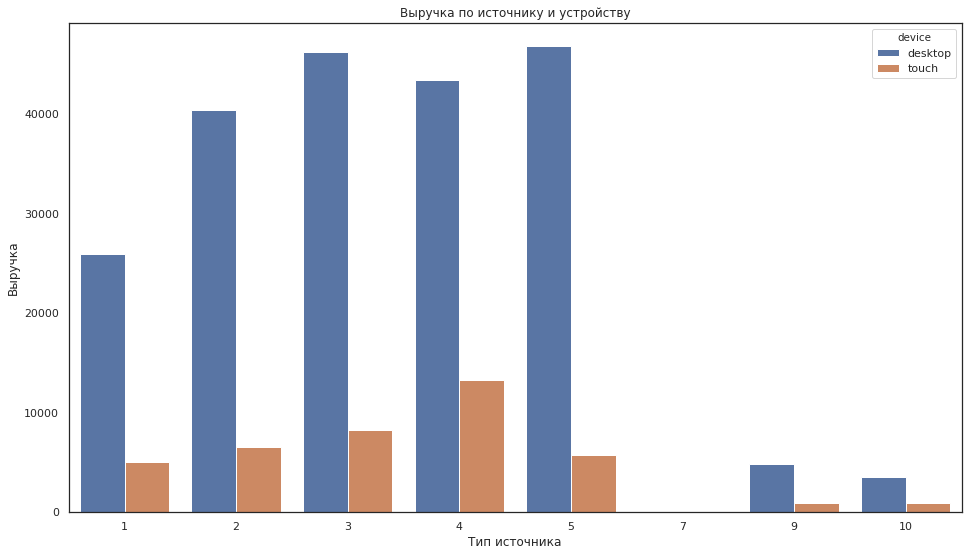

In [146]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Выручка по источнику и устройству')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Выручка')
plt.show()

In [147]:
monthly_costs = costs.groupby(['month', 'source_id']).sum().reset_index()

In [148]:
report_new = pd.merge(report, monthly_costs, left_on=['first_order_month', 'first_activity_source'], right_on=['month', 'source_id'])
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [149]:
report_new 

,first_order_month,first_activity_source,n_buyers,order_month,revenue,gp,age,ltv,month,source_id,costs,cac
0,2017-06-01,1,190,2017-06-01,1378.70,1378.70,0,7.256316,2017-06-01,1,1125.61,5.924263
1,2017-06-01,1,190,2017-07-01,414.98,414.98,1,2.184105,2017-06-01,1,1125.61,5.924263
2,2017-06-01,1,190,2017-08-01,419.43,419.43,2,2.207526,2017-06-01,1,1125.61,5.924263
3,2017-06-01,1,190,2017-09-01,714.24,714.24,3,3.759158,2017-06-01,1,1125.61,5.924263
4,2017-06-01,1,190,2017-10-01,811.20,811.20,4,4.269474,2017-06-01,1,1125.61,5.924263
...,...,...,...,...,...,...,...,...,...,...,...,...
509,2018-05-01,3,844,2018-05-01,3256.54,3256.54,0,3.858460,2018-05-01,3,9411.42,11.150972
510,2018-05-01,4,804,2018-05-01,3802.91,3802.91,0,4.729988,2018-05-01,4,4214.21,5.241555
511,2018-05-01,5,497,2018-05-01,2094.04,2094.04,0,4.213360,2018-05-01,5,3669.56,7.383421
512,2018-05-01,9,60,2018-05-01,223.05,223.05,0,3.717500,2018-05-01,9,362.17,6.036167


In [150]:
cac = report_new.groupby(['first_activity_source', 'first_order_month']).agg({'cac': 'mean'}).reset_index()
cac.head(20)

,first_activity_source,first_order_month,cac
0,1,2017-06-01,5.924263
1,1,2017-07-01,6.705500
2,1,2017-08-01,8.423097
3,1,2017-09-01,6.616784
4,1,2017-10-01,6.811029
5,1,2017-11-01,7.546790
6,1,2017-12-01,7.073112
7,1,2018-01-01,9.185630
8,1,2018-02-01,8.016291
9,1,2018-03-01,6.736975


In [151]:
orders_new = orders.merge(first_activity_source, on='uid', how='inner')
orders_new.head()

,uid,revenue,purchase_ts,buy_month,buy_date,buy_week,buy_year,order_month,first_activity_source
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01,22,2017,2017-06-01,1
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01,22,2017,2017-06-01,2
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01,22,2017,2017-06-01,2
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01,22,2017,2017-06-01,2
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01,22,2017,2017-06-01,3


In [152]:
orders_new.groupby(['order_month','first_activity_source'])['uid'].agg('count').reset_index()

,order_month,first_activity_source,uid
0,2017-06-01,1,268
1,2017-06-01,2,281
2,2017-06-01,3,704
3,2017-06-01,4,467
4,2017-06-01,5,447
...,...,...,...
81,2018-05-01,4,1065
82,2018-05-01,5,641
83,2018-05-01,9,96
84,2018-05-01,10,159


In [153]:
costs_by_source = costs.groupby(['month','source_id'])['costs'].agg('sum').reset_index()
costs_by_source

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [154]:
report_new['cac'].mean()

8.50215567312589

In [155]:
costs['costs'].sum() / orders['uid'].nunique()

9.011626098622786

In [156]:
cac.groupby('first_activity_source')['cac'].agg('mean')

first_activity_source
1      7.212107
2     12.504068
3     13.802743
4      6.439374
5      7.451938
9      5.413892
10     4.867125
Name: cac, dtype: float64

In [157]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [158]:
report_new.head()

,first_order_month,first_activity_source,n_buyers,order_month,revenue,gp,age,ltv,month,source_id,costs,cac,romi
0,2017-06-01,1,190,2017-06-01,1378.70,1378.70,0,7.256316,2017-06-01,1,1125.61,5.924263,1.224847
1,2017-06-01,1,190,2017-07-01,414.98,414.98,1,2.184105,2017-06-01,1,1125.61,5.924263,0.368671
2,2017-06-01,1,190,2017-08-01,419.43,419.43,2,2.207526,2017-06-01,1,1125.61,5.924263,0.372625
3,2017-06-01,1,190,2017-09-01,714.24,714.24,3,3.759158,2017-06-01,1,1125.61,5.924263,0.634536
4,2017-06-01,1,190,2017-10-01,811.20,811.20,4,4.269474,2017-06-01,1,1125.61,5.924263,0.720676


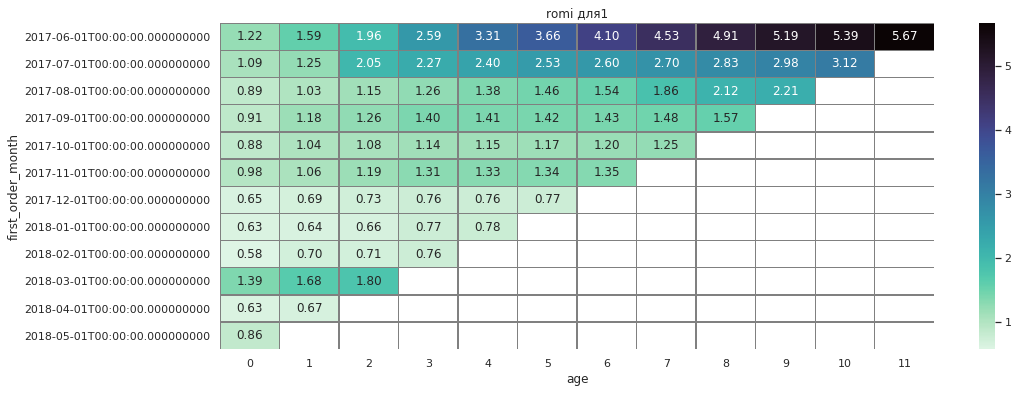

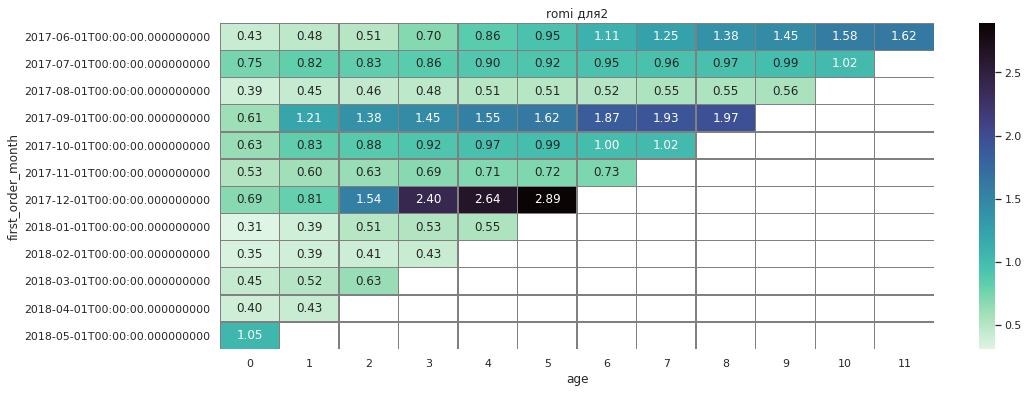

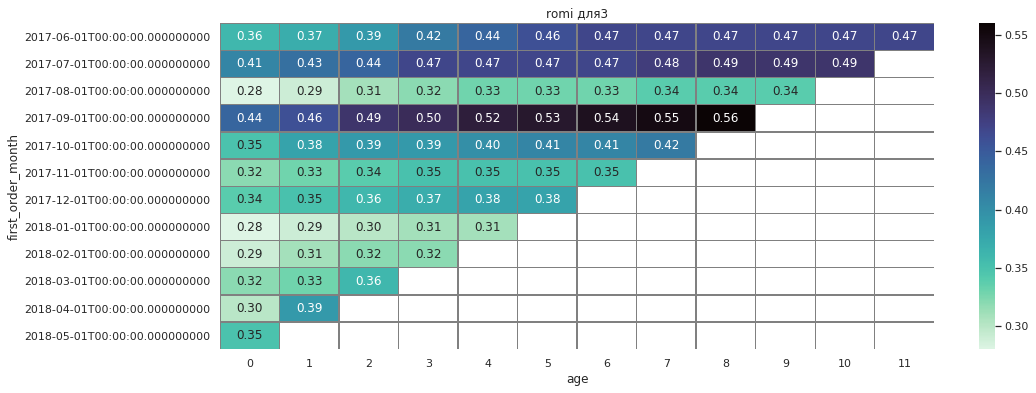

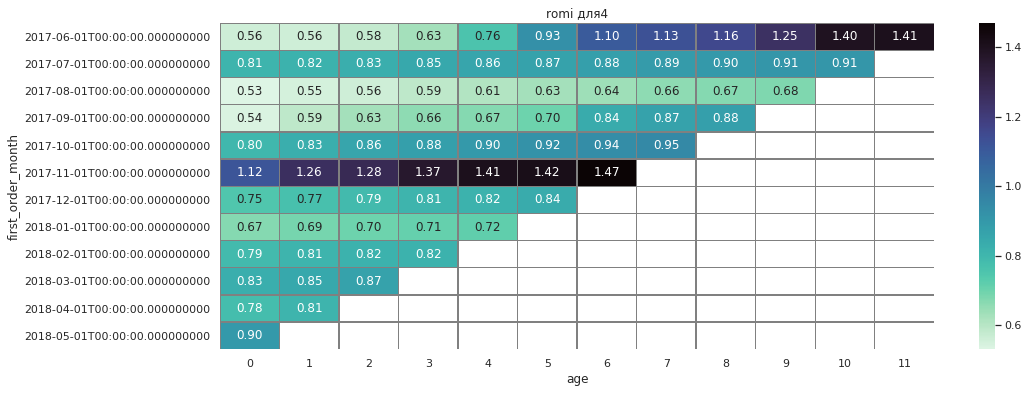

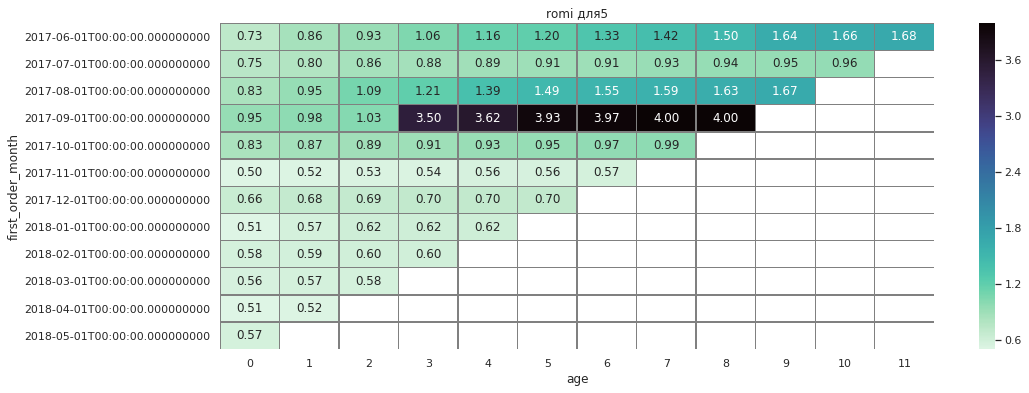

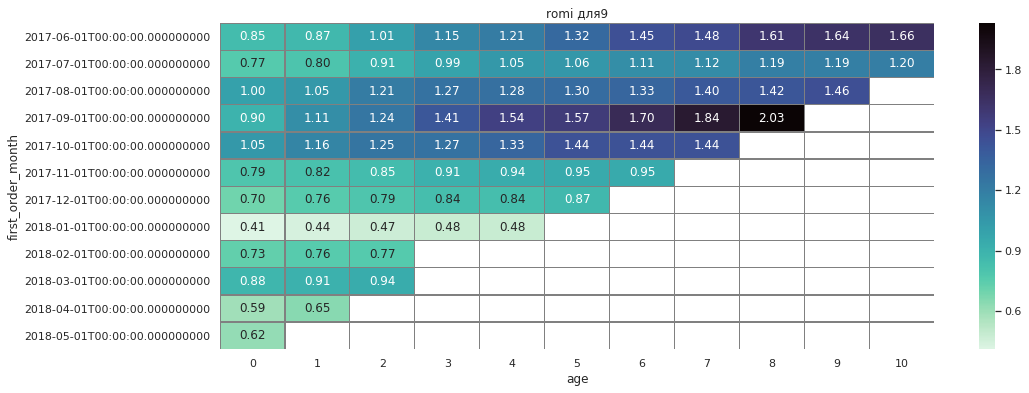

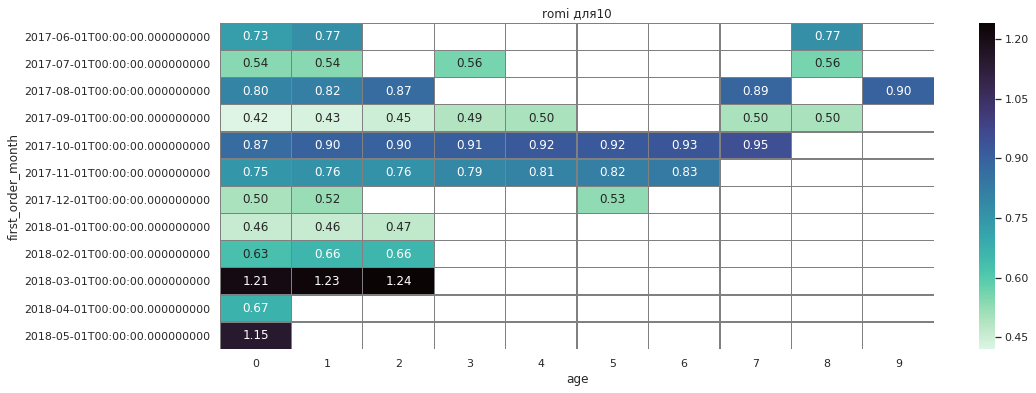

In [159]:
for source in report_new.first_activity_source.unique():
    output = report_new.query('first_activity_source == @source').pivot_table(index = 'first_order_month',
    columns = 'age',
    values = 'romi',
    aggfunc = 'mean').round(2).cumsum(axis=1)
    plt.figure(figsize=(16,6))
    ax = sns.heatmap(output, linewidths=0.3, annot=True, fmt='.2f', linecolor='gray', cmap='mako_r')
    ax.set_title('romi для' +str(source))
    plt.show()

In [160]:
romi = []
for source in report_new['first_activity_source'].unique():
    roi_per_source = report_new.query('first_activity_source == @source').pivot_table(index = 'first_order_month', columns = 'age', values='romi', aggfunc='mean').mean(axis=0).sum().round(2)
    romi.append([source, roi_per_source])
roi_per_source = pd.DataFrame(romi, columns=['source','romi'])
roi_per_source

,source,romi
0,1,2.73
1,2,1.43
2,3,0.42
3,4,1.13
4,5,1.40
5,9,1.32
6,10,0.84


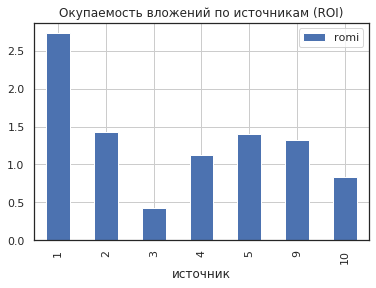

In [161]:
roi_per_source.plot(kind='bar', x='source', y='romi', grid=True)
plt.title('Окупаемость вложений по источникам (ROI)')
plt.xlabel('источник')
plt.show()

<a class="anchor" id="41-bullet">

 <a class="anchor" id="41-bullet">

<a class="anchor" id="31-bullet">

# Вывод:

В декабре самый сильный пик, это скорее всего связано с Новым годом. После первого месяца к нам возвращается 7-8%,с последующим месяцем,ещё меньше 
Тач г